In [1]:
import numpy as np
from scipy.io import netcdf_file
from rtmag.paper.flhcart import BField
import matplotlib.pyplot as plt

In [2]:
data = np.load('11158.npz')

# B

In [3]:
B = data['B']
B.shape

(512, 256, 256, 3)

In [4]:
nx, ny, nz, _ = B.shape

In [5]:
bx = B[:, :, :, 0].transpose(2, 1, 0)
by = B[:, :, :, 1].transpose(2, 1, 0)
bz = B[:, :, :, 2].transpose(2, 1, 0)

In [6]:
x1 = data['x'][:-1]
y1 = data['y'][:-1]
z1 = data['z'][:-1]
z, y, x = np.meshgrid(z1, y1, x1, indexing='ij')

In [7]:
fname = '11158_B.nc'
f = netcdf_file(fname, 'w')
f.createDimension('xdim', nx)
f.createDimension('ydim', ny)
f.createDimension('zdim', nz)
xv = f.createVariable('x', 'f', ('xdim',))
yv = f.createVariable('y', 'f', ('ydim',))
zv = f.createVariable('z', 'f', ('zdim',))
xv[:], yv[:], zv[:] = x1, y1, z1
bxv = f.createVariable('bx', 'f', ('zdim','ydim','xdim'))
byv = f.createVariable('by', 'f', ('zdim','ydim','xdim'))
bzv = f.createVariable('bz', 'f', ('zdim','ydim','xdim'))
bxv[:,:,:] = bx
byv[:,:,:] = by
bzv[:,:,:] = bz
f.close()

In [8]:
B = BField(fname, clean=False)

Computing A...


In [9]:
bbx = B.bx(x, y, z)
bby = B.by(x, y, z)
bbz = B.bz(x, y, z)

In [10]:
bbx = bbx.transpose(2, 1, 0)
bby = bby.transpose(2, 1, 0)
bbz = bbz.transpose(2, 1, 0)

bbx.shape

(512, 256, 256)

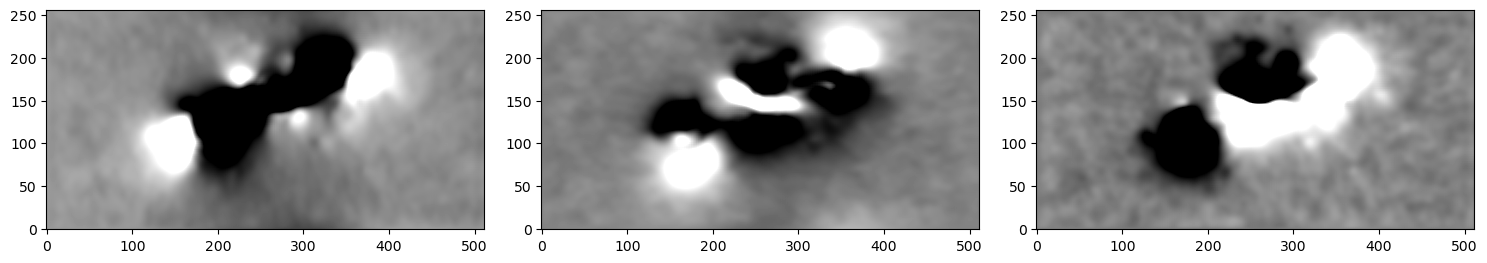

In [20]:
vmm = 100
h = 10

fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(131)
ax.imshow(bbx[:, :, h].T, origin='lower', cmap='gray', vmin=-vmm, vmax=vmm)

ax = fig.add_subplot(132)
ax.imshow(bby[:, :, h].T, origin='lower', cmap='gray', vmin=-vmm, vmax=vmm)

ax = fig.add_subplot(133)
ax.imshow(bbz[:, :, h].T, origin='lower', cmap='gray', vmin=-vmm, vmax=vmm)

plt.tight_layout()
plt.show()

In [12]:
del(B.bxs, B.bys, B.bzs)
B.computeBfromA()

In [13]:
cbbx = B.bx(x, y, z)
cbby = B.by(x, y, z)
cbbz = B.bz(x, y, z)

In [14]:
cbbx = cbbx.transpose(2, 1, 0)
cbby = cbby.transpose(2, 1, 0)
cbbz = cbbz.transpose(2, 1, 0)

cbbx.shape

(512, 256, 256)

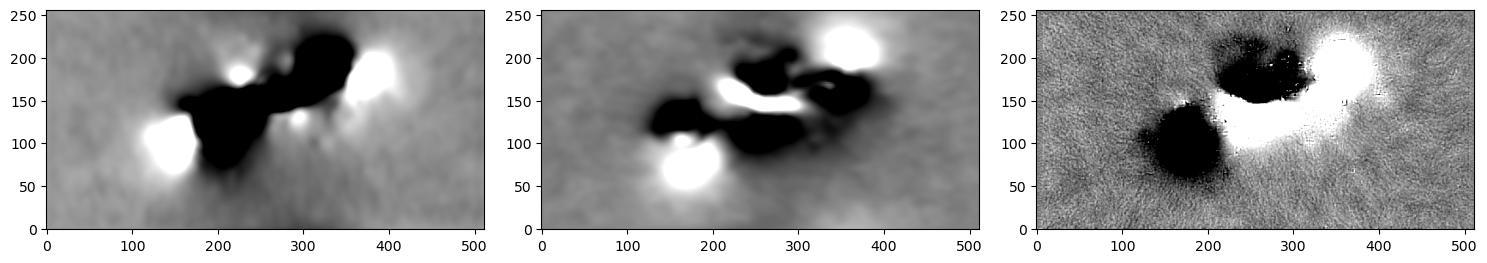

In [21]:
vmm = 100
h = 10

fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(131)
ax.imshow(cbbx[:, :, h].T, origin='lower', cmap='gray', vmin=-vmm, vmax=vmm)

ax = fig.add_subplot(132)
ax.imshow(cbby[:, :, h].T, origin='lower', cmap='gray', vmin=-vmm, vmax=vmm)

ax = fig.add_subplot(133)
ax.imshow(cbbz[:, :, h].T, origin='lower', cmap='gray', vmin=-vmm, vmax=vmm)

plt.tight_layout()
plt.show()

In [36]:
cbb = np.stack((cbbx, cbby, cbbz), axis=-1)
cbb.shape

(512, 256, 256, 3)

In [37]:
np.save('11158_B.npy', cbb)

# b

In [23]:
b = data['b']
b.shape

(512, 256, 256, 3)

In [24]:
nx, ny, nz, _ = b.shape

In [25]:
bx = b[:, :, :, 0].transpose(2, 1, 0)
by = b[:, :, :, 1].transpose(2, 1, 0)
bz = b[:, :, :, 2].transpose(2, 1, 0)

In [26]:
x1 = data['x'][:-1]
y1 = data['y'][:-1]
z1 = data['z'][:-1]
z, y, x = np.meshgrid(z1, y1, x1, indexing='ij')

In [27]:
fname = '11158_b.nc'
f = netcdf_file(fname, 'w')
f.createDimension('xdim', nx)
f.createDimension('ydim', ny)
f.createDimension('zdim', nz)
xv = f.createVariable('x', 'f', ('xdim',))
yv = f.createVariable('y', 'f', ('ydim',))
zv = f.createVariable('z', 'f', ('zdim',))
xv[:], yv[:], zv[:] = x1, y1, z1
bxv = f.createVariable('bx', 'f', ('zdim','ydim','xdim'))
byv = f.createVariable('by', 'f', ('zdim','ydim','xdim'))
bzv = f.createVariable('bz', 'f', ('zdim','ydim','xdim'))
bxv[:,:,:] = bx
byv[:,:,:] = by
bzv[:,:,:] = bz
f.close()

In [28]:
b = BField(fname, clean=False)

Computing A...


In [29]:
_bbx = b.bx(x, y, z)
_bby = b.by(x, y, z)
_bbz = b.bz(x, y, z)

In [30]:
_bbx = _bbx.transpose(2, 1, 0)
_bby = _bby.transpose(2, 1, 0)
_bbz = _bbz.transpose(2, 1, 0)

_bbx.shape

(512, 256, 256)

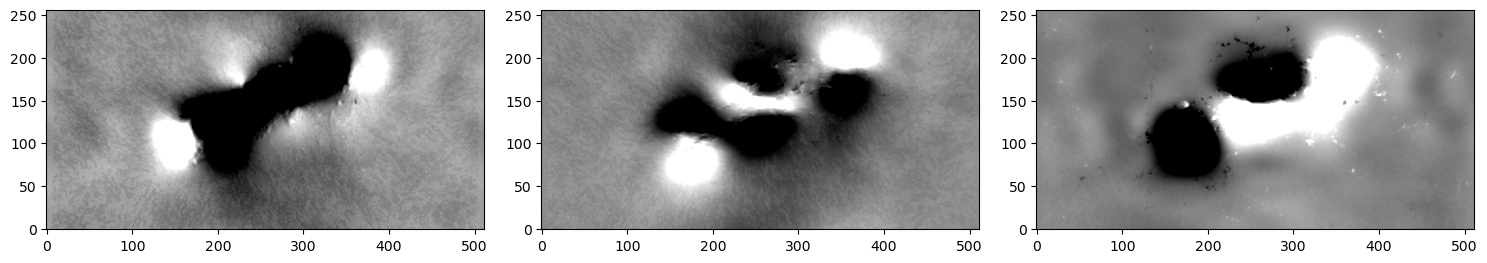

In [31]:
vmm = 100
h = 10

fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(131)
ax.imshow(_bbx[:, :, h].T, origin='lower', cmap='gray', vmin=-vmm, vmax=vmm)

ax = fig.add_subplot(132)
ax.imshow(_bby[:, :, h].T, origin='lower', cmap='gray', vmin=-vmm, vmax=vmm)

ax = fig.add_subplot(133)
ax.imshow(_bbz[:, :, h].T, origin='lower', cmap='gray', vmin=-vmm, vmax=vmm)

plt.tight_layout()
plt.show()

In [32]:
del(b.bxs, b.bys, b.bzs)
b.computeBfromA()

In [33]:
_cbbx = b.bx(x, y, z)
_cbby = b.by(x, y, z)
_cbbz = b.bz(x, y, z)

In [34]:
_cbbx = _cbbx.transpose(2, 1, 0)
_cbby = _cbby.transpose(2, 1, 0)
_cbbz = _cbbz.transpose(2, 1, 0)

_cbbx.shape

(512, 256, 256)

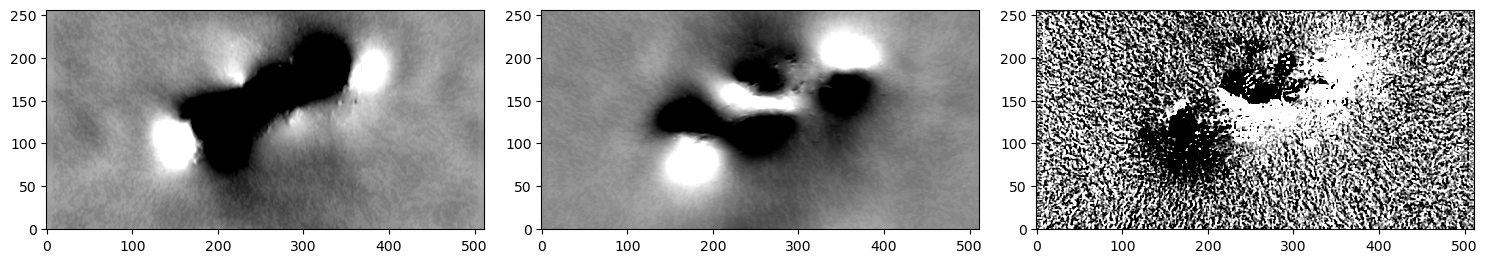

In [35]:
vmm = 100
h = 10

fig = plt.figure(figsize=(15, 10))

ax = fig.add_subplot(131)
ax.imshow(_cbbx[:, :, h].T, origin='lower', cmap='gray', vmin=-vmm, vmax=vmm)

ax = fig.add_subplot(132)
ax.imshow(_cbby[:, :, h].T, origin='lower', cmap='gray', vmin=-vmm, vmax=vmm)

ax = fig.add_subplot(133)
ax.imshow(_cbbz[:, :, h].T, origin='lower', cmap='gray', vmin=-vmm, vmax=vmm)

plt.tight_layout()
plt.show()

In [38]:
_cbb = np.stack((_cbbx, _cbby, _cbbz), axis=-1)
_cbb.shape

(512, 256, 256, 3)

In [39]:
np.save('11158_b.npy', _cbb)